In [190]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

In [191]:
file_path = 'DailyDelhiClimateTrain.csv'

In [192]:
df = pd.read_csv(file_path)

In [193]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [194]:
data = pd.date_range(start='2013-01-01', end='2017-01-01', freq='D')
df['Data'] = data
df.set_index('Data', inplace=True)

In [195]:
df['date'] = pd.to_datetime(df['date'])

In [196]:
media_diaria = df['humidity'].rolling(window=30, min_periods=7).mean()
desvio_diario = df['humidity'].rolling(window=30, min_periods=7).std()

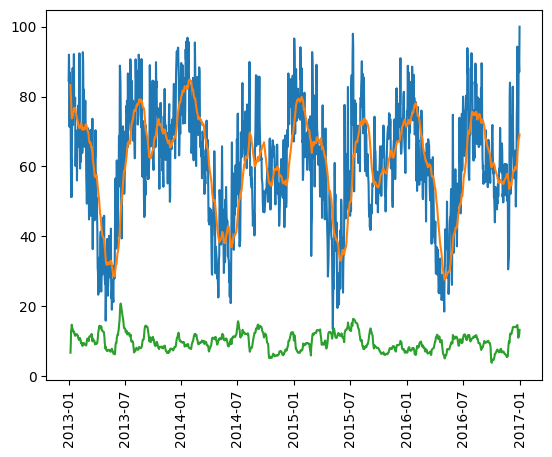

In [197]:
plt.plot(df[['humidity']])
plt.plot(media_diaria)
plt.plot(desvio_diario)
plt.xticks(rotation=90)
plt.show()

In [198]:
serie_temp = df[['humidity']]
decomp = seasonal_decompose(serie_temp, model='multiplicative', period=100)

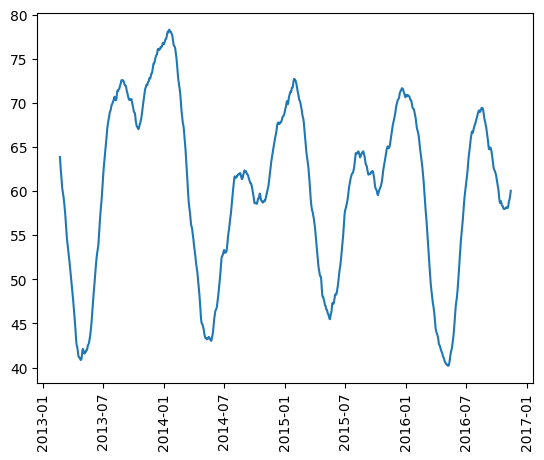

In [199]:
plt.plot(decomp.trend)
plt.xticks(rotation=90)
plt.show()

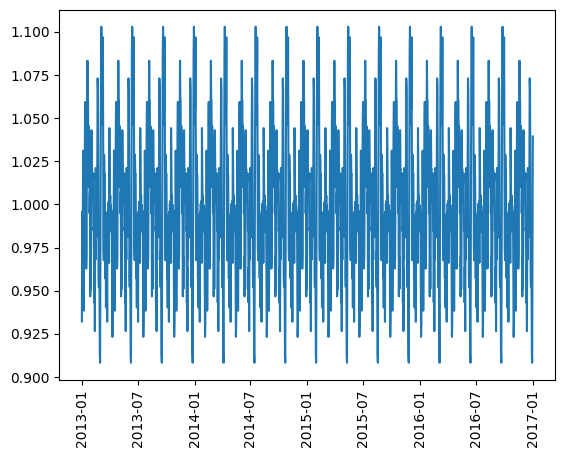

In [200]:
plt.plot(decomp.seasonal)
plt.xticks(rotation=90)
plt.show()

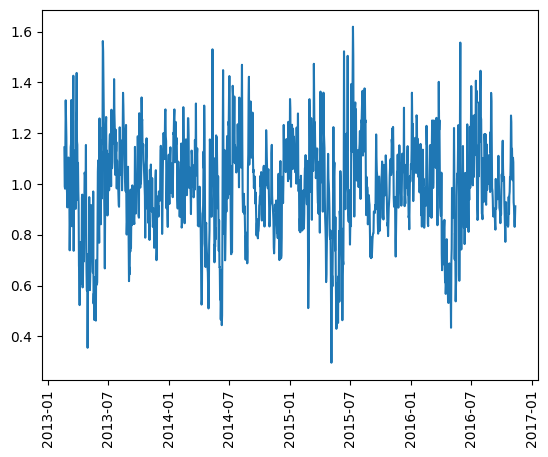

In [201]:
plt.plot(decomp.resid)
plt.xticks(rotation=90)
plt.show()

In [202]:
from statsmodels.tsa.stattools import adfuller
adftest = adfuller(df['humidity'])

out = pd.Series(adftest[0:4], index=['Teste','p-valor','Lags','Número de observações usadas'])
for key,value in adftest[4].items():
    out['Valor crítico (%s)'%key] = value
print(out)

Teste                             -3.675577
p-valor                            0.004470
Lags                              15.000000
Número de observações usadas    1446.000000
Valor crítico (1%)                -3.434880
Valor crítico (5%)                -2.863541
Valor crítico (10%)               -2.567835
dtype: float64
